In [5]:
import os  # Importamos el módulo os para interactuar con el sistema operativo
import numpy as np  # Importamos numpy para operaciones numéricas eficientes
from matplotlib import pyplot  # Importamos pyplot de matplotlib para visualización de datos


In [7]:

# Leer datos
data = np.genfromtxt('UltimoGoogleplaystore.csv', delimiter=',', skip_header=1, dtype=str)
print(data[:10])



[['4.1' '159' '19' '10.00' '0' '0' '2018' '4' '' '']
 ['3.9' '967' '14' '500.00' '0' '0' '2018' '4' '' '']
 ['4.7' '87510' '8.7' '5000000' '0' '0' '2018' '4' '' '']
 ['4.5' '215644' '25' '50000000' '0' '0' '2018' '4' '' '']
 ['4.3' '967' '2.8' '100.00' '0' '0' '2018' '4' '' '']
 ['4.4' '167' '5.6' '50.00' '0' '0' '2017' '2' '' '']
 ['3.8' '178' '19' '50.00' '0' '0' '2018' '4' '' '']
 ['4.1' '36815' '29' '1000000' '0' '0' '2018' '4' '' '']
 ['4.4' '13791' '33' '1000000' '0' '0' '2017' '3' '' '']
 ['4.7' '121' '3.1' '10.00' '0' '0' '2018' '4' '' '']]


In [ ]:
# Normalizar las características con la ecuacion de la clase
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


In [ ]:
# Se Agrega una columna de unos para el término de sesgo
# Se elimina una fila con los con valores faltantes
data[data == ''] = '0'  # Reemplaza las cadenas vacías con '0'
X = data[:, 1:].astype(float)
X_norm, mu, sigma = normalizarCaracteristicas(X)
m = len(X_norm)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [ ]:
# Normalizamos las características
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


In [ ]:
# Agregamos una columna de unos para el término de sesgo
X = data[:, 1:].astype(float)
X_norm, mu, sigma = normalizarCaracteristicas(X)
m = len(X_norm)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [ ]:
y = data[:, 0].astype(float)


In [ ]:
# Calcular el costo y aplicar el descenso de gradiente
def calcularCosto(X, y, theta):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y))
    return J

In [ ]:
def calcularDescensoGradiente(X, y, theta, alpha, num_iter):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(num_iter):
        theta = theta - (alpha / m) * np.dot(X.T, (np.dot(X, theta) - y))
        J_historico.append(calcularCosto(X, y, theta))

    return theta, J_historico

# theta = np.zeros(3)  # Inicializamos theta
theta = np.zeros(X_ready.shape[1])


alpha = 0.01          # Tasa de aprendizaje
num_iter = 400        # Número de iteraciones

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_iter)


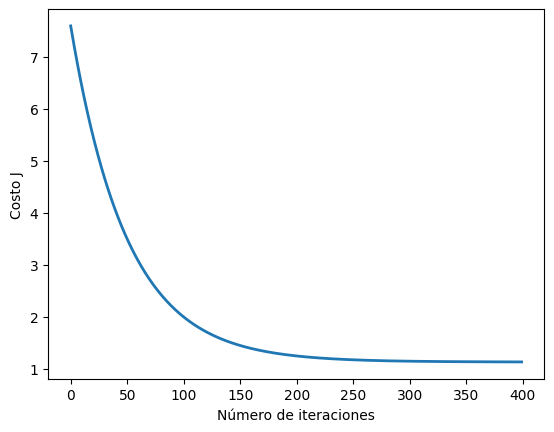

In [ ]:
# Funcion para graficar la convergencia del costo
import matplotlib.pyplot as plt

plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()


In [ ]:
#Calculamos la Normal
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
# Hacemos la predicciones
X_pred = np.array(X_pred)  # Convertir a un array de numpy
X_pred = X_pred.reshape(1, -1)  # Ajustar la forma para que sea un vector fila

# Aseguramos de que theta tenga la forma adecuada
theta = theta[:X_pred.shape[1]]

rating_predicho = np.dot(X_pred, theta)


In [ ]:
print(f"Rating predicho para una aplicación con 2305 reviews y tamaño 4: {rating_predicho}")

Rating predicho para una aplicación con 2305 reviews y tamaño 4: [135.7637706]
